In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
monthly = pd.read_csv('../monthly.csv', index_col=0, header=[0], parse_dates=True)
monthly = monthly.drop(columns="BAA10YM") # duplicate with extra dataset
monthly.head()

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,T10Y2YM,T10YFFM,UMCSENT,UNRATE,USSLIND
DATE,,,,,,,,,,,,,,,
1919-01-01,NaN,NaN,NaN,5.0124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-02-01,NaN,NaN,NaN,4.7908,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-03-01,NaN,NaN,NaN,4.6524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-04-01,NaN,NaN,NaN,4.7355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1919-05-01,NaN,NaN,NaN,4.7632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
upsampled = pd.read_csv('../upsampled.csv', index_col=0, header=[0], parse_dates=True)
upsampled.head()

,A191RL1Q225SBEA,A191RO1Q156NBEA,GDPC1,GFDEGDQ188S,GPDI,PCEC
DATE,,,,,,
1947-01-01,NaN,NaN,2033.061000,NaN,35.854000,156.161000
1947-02-01,NaN,NaN,2031.253667,NaN,35.404333,157.451000
1947-03-01,NaN,NaN,2029.446333,NaN,34.954667,158.741000
1947-04-01,-1.000000,NaN,2027.639000,NaN,34.505000,160.031000
1947-05-01,-0.933333,NaN,2026.243333,NaN,34.640333,161.201667


In [9]:
extra = pd.read_csv('../extra.csv', index_col=0, header=[1], parse_dates=True)
extra.head()

,AAA,BAA,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA
DATE,,,,,,,,,,,
1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.1,NaN,NaN
1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.9,NaN,NaN


In [10]:
pmi = pd.read_csv('../pmi.csv', index_col=0, header=[5], parse_dates=True)
pmi.head()
# need to reverse and rename

,PX_LAST
Date,
2019-06-30,51.7
2019-05-31,52.1
2019-04-30,52.8
2019-03-31,55.3
2019-02-28,54.2


In [11]:
pmi = pmi.rename(columns={"PX_LAST": "PMI"})
pmi = pmi.iloc[::-1]
pmi.index = pmi.index.to_period('M').to_timestamp(how='start')
pmi.head()

,PMI
Date,
1948-01-01,51.7
1948-02-01,50.2
1948-03-01,43.3
1948-04-01,45.4
1948-05-01,49.5


In [12]:
full = pd.concat([monthly, upsampled, extra, pmi], axis=1)
full.head()

,CPIAUCSL,FEDFUNDS,HOUST,INDPRO,INTDSRUSM193N,ISRATIO,M2SL,MTSDS133FMS,PAYEMS,PCE,...,CIVPART,GS20,GS3,IRLTLT01USM156N,M1SL,MCOILWTICO,PPIACO,TCU,TOTALSA,PMI
1913-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.1,NaN,NaN,NaN
1913-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
1913-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
1913-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN
1913-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,11.9,NaN,NaN,NaN


In [13]:
# UMCSENT used to be quarterly

full["UMCSENT"] = full["UMCSENT"].resample('MS').interpolate(method='linear')

In [14]:
print(monthly.shape)
print(upsampled.shape)
print(extra.shape)
print(pmi.shape)
print(full.shape)

(1206, 15)
(865, 6)
(1278, 11)
(858, 1)
(1278, 33)


In [10]:
full.to_csv('full.csv')

In [15]:
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

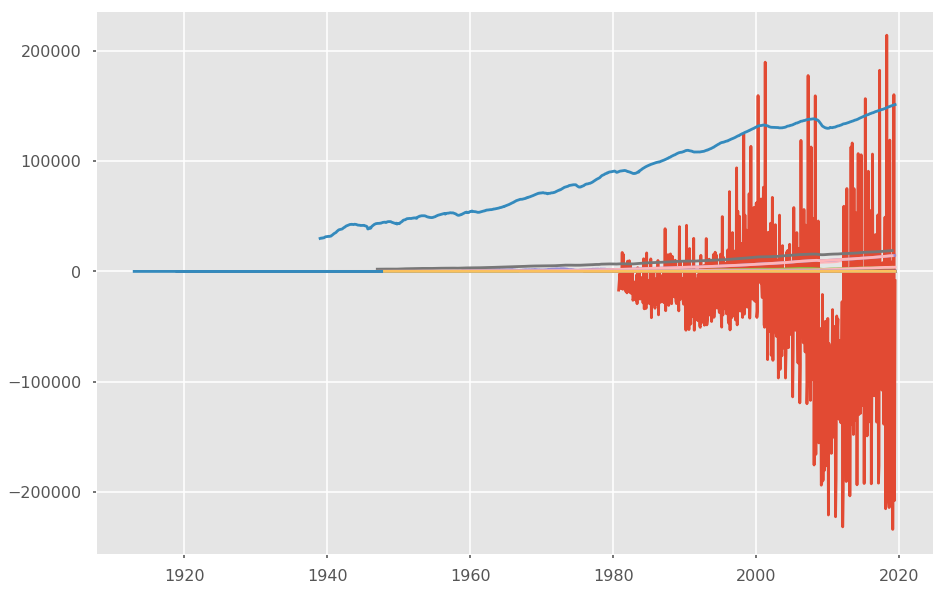

In [18]:
plt.figure(figsize=(15,10))
plt.plot(full)
plt.savefig('../Figs/full.png', bbox_inches='tight')
# plt.show()